# Classifying Iris Species Using k-Nearest Neighbors

### Pavan Josyula

#### October 9, 2020

## Installing all required libraries

In [1]:
pip install pandas==1.1.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.19.2

     |████████████████████████████████| 14.5MB 7.0MB/s eta 0:00:01    |██                              | 921kB 6.8MB/s eta 0:00:03     |███▍                            | 1.6MB 6.8MB/s eta 0:00:02     |██████████▉                     | 4.9MB 6.8MB/s eta 0:00:02�████████████▌      | 11.6MB 6.8MB/s eta 0:00:01��██████████████████████████▊ | 13.9MB 7.0MB/s eta 0:00:01
  Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy==1.5.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib==3.3.2

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn==0.11.0

     |████████████████████████████████| 286kB 6.7MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8MB 6.6MB/s eta 0:00:01     |████                            | 849kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 5.4MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
Note: you may need to restart the kernel to use updated packages.


## Importing all required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import matplotlib
import scipy

In [9]:
import sklearn

Checking the versions of all installed libraries:

In [10]:
print('''Pandas version is: {0}
Numpy version is: {1}
Scipy version is: {2}
Matplotlib version is: {3}
Seaborn version is: {4}
Scikit-learn version is: {5}'''.format(pd.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__, sklearn.__version__))

Pandas version is: 1.1.2
Numpy version is: 1.19.2
Scipy version is: 1.5.2
Matplotlib version is: 3.3.2
Seaborn version is: 0.11.0
Scikit-learn version is: 0.23.2


### Importing Data set

The dataset for classfying iris species is present in the <em>datasets</em> module of <strong>scikit-learn</strong>. 

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris_dataset = load_iris()

The <em>iris_dataset</em> object is a <em>Bunch</em> object. It's just like dictionary, it contains keys and values. 

In [13]:
type(iris_dataset)

sklearn.utils.Bunch

In [14]:
print("Keys of iris_dataset are:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset are:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key 'DESCR' is a short description of the dataset. 

In [15]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The value of the key 'target_names' is an array of strings, containing the species of the flowers that we want to predict.

In [16]:
print("Target Names: \n{}".format(iris_dataset['target_names']))

Target Names: 
['setosa' 'versicolor' 'virginica']


The value of the key 'feature_names' is a list of strings, giving the description of each feature.

In [17]:
print("Feature Names:\n{}".format(iris_dataset['feature_names']))

Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in <em>target</em> and <em>data</em> fields. <em>data</em> consists of numeric measurements representing the features of iris flowers in a NumPy array.

In [18]:
print("Type of data:\n{}".format(type(iris_dataset['data'])))

Type of data:
<class 'numpy.ndarray'>


In [19]:
print("Shape of the data:\n{}".format(iris_dataset['data'].shape))

Shape of the data:
(150, 4)


There are 150 samples in the dataset and 4 features. Remember, the rows of the dataset represent the flowers, whereas the columns represent the features.

In [20]:
print("First five columns of the data:\n{}".format(iris_dataset['data'][0:5]))

First five columns of the data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The <em>target</em> array consists of the species of each of the flowers that were measured, as a NumPy array:

In [21]:
print("Type of target:\n{}".format(type(iris_dataset['target'])))

Type of target:
<class 'numpy.ndarray'>


In [22]:
print("Shape of target array:\n{}".format(iris_dataset['target'].shape))

Shape of target array:
(150,)


The *target* array is an one-dimensional array.

In [23]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The species are encoded as 0, 1, and 2. The meanings of the numbers are:<br>
0 means *setosa*, 1 means *versicolor*, and 2 means *virginica*.

## Splitting up the dataset: Training & Test sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = iris_dataset['data']; y = iris_dataset['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

In [27]:
print('''Types of X_train:{0}
X_test:{1}
y_train:{2}
y_test:{3}'''.format(type(X_train), type(X_test), 
                    type(y_train), type(y_test)))

Types of X_train:<class 'numpy.ndarray'>
X_test:<class 'numpy.ndarray'>
y_train:<class 'numpy.ndarray'>
y_test:<class 'numpy.ndarray'>


In [28]:
print('''X_train shape: {0}
y_train shape: {1}
X_test shape: {2}
y_test shape: {3}'''.format(X_train.shape, y_train.shape,
                           X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


## Visualizing the training set:

In [29]:
#create dataframe from the data in X_train
#label the columns using the strings in the iris_dataset.feature_names
iris_dataframe = pd.DataFrame(data=X_train, columns=iris_dataset['feature_names'])

In [30]:
iris_dataframe.head() #printing the first 5 rows of the iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.4,2.8,6.1,1.9
1,7.7,2.8,6.7,2.0
2,5.5,2.4,3.7,1.0
3,6.1,2.8,4.0,1.3
4,5.5,2.5,4.0,1.3


In [31]:
iris_dataframe.tail(7) #printing the last 7 rows of the iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,6.6,3.0,4.4,1.4
106,5.4,3.9,1.7,0.4
107,5.0,3.3,1.4,0.2
108,5.1,3.7,1.5,0.4
109,4.8,3.0,1.4,0.3
110,5.8,2.6,4.0,1.2
111,4.6,3.2,1.4,0.2


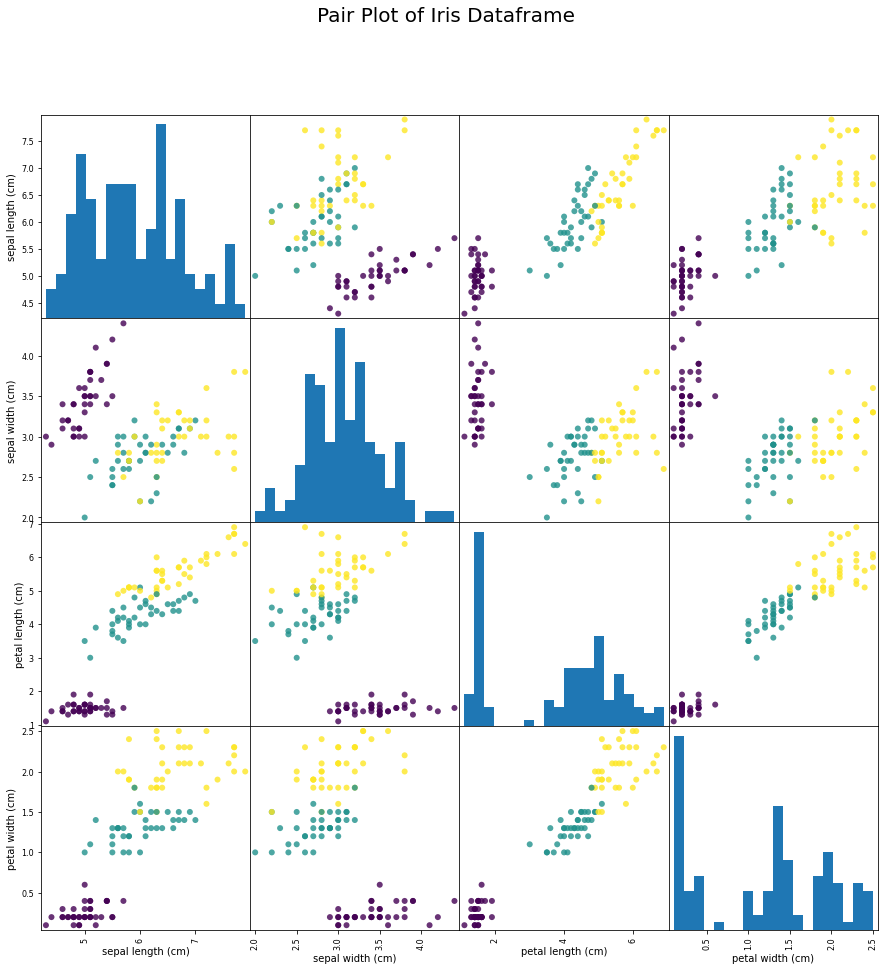

In [43]:
#importing scatter_matrix from pandas.plotting
from pandas.plotting import scatter_matrix
#creating scatter matrix from the dataframe and color by y_train:
iris_sm = scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), alpha=.8, marker='o', hist_kwds={'bins':20})
plt.suptitle("Pair Plot of Iris Dataframe", size=20)
plt.show()

## Building k-Nearest Neighbors Model

In [44]:
#importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
#Instantiating the class into an object
knn = KNeighborsClassifier(n_neighbors=1)

<pr>&emsp;The <strong>'knn'</strong> object encapsulates the algorithm that will be used to build the model from the training dataset as well as the algorithm to make predictions on the new data set. It will also hold the information that the algorithm has extracted from the training data. In the case of <code>KNeighborsClassifier</code>, it will just store the training set.</pr><br>
<pr>&emsp;To build the model on the training dataset, I call the <strong>fit</strong> method of the <strong>knn</strong> object, which takes as arguments the NumPy array <em>X_train</em> containing the training data and the NumPy array <em>y_train</em> of the corresponding training labels.</pr>

In [45]:
#fitting the trainig data to the knn object:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Now, the training set has been fit to the kNN classifier and we can make predictions on new data which the classifier has never seen before. 

## Testing the kNN classifier model

In [46]:
#creating a new random sample to test the classifier:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [47]:
prediction = knn.predict(X_new)

In [48]:
print('''Prediction: {0}
Prediction target name: {1}'''.format(prediction, iris_dataset['target_names'][prediction]))

Prediction: [0]
Prediction target name: ['setosa']


## Evaluating the Classifier Model

<pr>&nbsp;This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.</pr><br>
<pr>&nbsp;Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
    computing the <em>accuracy</em>, which is the fraction of flowers for which the right species
was predicted:</pr>

In [49]:
y_pred = knn.predict(X_test)

In [51]:
print("Predictions on test set:\n{}".format(y_pred))

Predictions on test set:
[0 1 1 1 0 1 2 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 1 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [52]:
score = knn.score(X_test, y_test)

In [54]:
print('''Score:\n{0}
Accuracy:\n{1}'''.format(score, round(score*100,2)))

Score:
0.9473684210526315
Accuracy:
94.74
